In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization library
import seaborn as sns

In [45]:
df = pd.read_csv("df_Preprocessed.csv")
df=df.drop(['dteday'], axis=1)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,cluster
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,low
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,low
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,low
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,low
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,low


## Train and Test set Splitting

In [46]:
from sklearn.model_selection import train_test_split

feature_cols = ['season','mnth','workingday','weathersit']
X = df.loc[:, feature_cols]
y = df.cluster
yReg= df.cnt

#Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_trainReg, X_testReg, y_trainReg, y_testReg = train_test_split(X, yReg, test_size=0.30, random_state=42)

print("Train size",X_train.shape[0])
print("Test size", len(X_test))

Train size 511
Test size 220


## Model creation

In [59]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier




def  My_Classifier (X_train, y_train, X_test, y_test):
    maxScore =0
    logreg = LogisticRegression()
    clf=RandomForestClassifier(n_estimators=100)
    nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
    #nn= MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (50, 100, 50), learning_rate= 'constant', solver= 'adam')
    
    #fit
    logreg.fit(X_train, y_train)
    clf.fit(X_train,y_train)
    nn.fit(X_train, y_train)   

    #Score
    score=logreg.score(X_test,y_test)
    print('Logistic Regression SCORE: ', score)
    score=clf.score(X_test,y_test)
    print('Random Forest SCORE: ', score)
    score=nn.score(X_test,y_test)
    print('Neural Network: ', score)
    
    #Score for K-Neigh
    for n in range (1,100):
        neigh = KNeighborsClassifier(n_neighbors=n)
        neigh.fit(X_train, y_train) 
        if maxScore < neigh.score(X_test,y_test):
            n1 = n
            maxScore = neigh.score(X_test,y_test)

    print('K-Neighbors SCORE: ', maxScore, ' N= ', n1)
    
My_Classifier (X_train, y_train,X_test, y_test)

Logistic Regression SCORE:  0.6363636363636364
Random Forest SCORE:  0.7772727272727272
Neural Network:  0.75
K-Neighbors SCORE:  0.7318181818181818  N=  2


In [48]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression




def  My_Regression (X_train, y_train, X_test, y_test):

    
    reg = LinearRegression()
    reg.fit(X_train,y_train)

    y_predicted = reg.predict(X_test)

    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
    print('R²: %.2f' % r2_score(y_test, y_predicted))
    
My_Regression(X_trainReg, y_trainReg,X_testReg, y_testReg)

Mean squared error: 2911358.49
R²: 0.27


# Feature selection

In [49]:
feature_cols = ['instant','season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
X = df.loc[:, feature_cols]
y = df.cluster



In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 8 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

         Specs         Score
0      instant  33491.883011
3         mnth    142.379352
2           yr    125.752042
1       season     73.559153
8         temp     20.697685
9        atemp     17.442359
7   weathersit     12.650286
4      holiday      4.042412
5      weekday      3.531337
11   windspeed      1.342996


[0.15883597 0.07855279 0.12194609 0.06294001 0.00726365 0.0547161
 0.02664479 0.05382673 0.13883722 0.1630218  0.06582627 0.06758858]


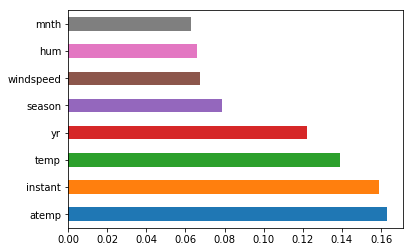

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

# Prediction using most effective features

In [52]:
import warnings; warnings.simplefilter('ignore')

features1=['mnth','yr','season','temp','atemp','hum']
X = df.loc[:, features1]
y = df.cluster

#Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_trainReg, X_testReg, y_trainReg, y_testReg = train_test_split(X, yReg, test_size=0.30, random_state=42)

print("Train size",X_train.shape[0])
print("Test size", len(X_test))
My_Classifier(X_train, y_train,X_test, y_test)


Train size 511
Test size 220
Logistic Regression SCORE:  0.6363636363636364
Random Forest SCORE:  0.7636363636363637
Neural Network:  0.7818181818181819
K-Neighbors SCORE:  0.7318181818181818  N=  2


## Prediction using Regression

In [53]:
My_Regression(X_trainReg, y_trainReg,X_testReg, y_testReg)

Mean squared error: 1040365.10
R²: 0.74


# Parameter Tuning for Neural Network 

In [54]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

In [55]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [58]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.521 (+/-0.068) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.703 (+/-0.013) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.499 (+/-0.015) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.695 (+/-0.058) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.456 (+/-0.046) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.695 (+/-0.077) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver

In [70]:
nn= MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (50, 100, 50), learning_rate= 'constant', solver= 'adam')
nn.fit(X_train, y_train)
score=nn.score(X_test,y_test)
print('Neural Network: ', score)

Neural Network:  0.7818181818181819
